# Statistical and Machine Learning Models for Fundamentalist Data

This notebook is a useful tool for investors interested in the Brazilian stock market. It integrates machine learning techniques and statistical models to analyze fundamentalist data of companies listed on the stock exchange. The aim is to provide in-depth analysis and facilitate investment decision-making, focusing on identifying opportunities and mitigating risks. It includes interactive visualizations and real-time updates, making it accessible and practical for both experienced investors and beginners.

## Initial Setup

### Install Packages

In [69]:
%pip install pandas -q
%pip install plotly -q
%pip install scikit-learn -q

14232.43s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Note: you may need to restart the kernel to use updated packages.
14238.52s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Note: you may need to restart the kernel to use updated packages.
14244.31s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Note: you may need to restart the kernel to use updated packages.


### Import libs

In [70]:
import os
from pathlib import Path
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

### Create a file path default

In [71]:
file_path_book = str(Path(os.getcwd()).parent.parent / "data/book")

### Load data

In [72]:
df_fundamentals_book = pd.read_csv(file_path_book + "/fundamentals_book.csv")
df_fundamentals_book.head(5)

,ticker,long_name,sector,industry,market_cap,enterprise_value,total_revenue,profit_margins,operating_margins,dividend_rate,...,return_on_equity,gross_profits,total_assets_approx,asset_turnover,earnings_growth_rate,dividend_payout_ratio,equity,debt_to_equity,roi,roce
0,ABCB4.SA,Banco ABC Brasil S.A.,Financial Services,Banks - Regional,4.265434e+09,1.477339e+10,1.941779e+09,0.41576,0.38826,1.56,...,0.15680,1.973086e+09,7.774306e+09,0.249769,0.1,155000.000000,-1.052416e+10,-1.738710,0.131438,0.000000
1,AGRO3.SA,BrasilAgro - Companhia Brasileira de Proprieda...,Consumer Defensive,Farm Products,2.466480e+09,2.912933e+09,1.249437e+09,0.21493,0.25031,3.21,...,0.12170,3.155040e+08,3.838370e+08,3.255124,680.1,47.640053,-4.882380e+08,-1.786168,0.428927,0.079343
2,RAIL3.SA,Rumo S.A.,Industrials,Railroads,4.228882e+10,5.524305e+10,1.031746e+10,0.07639,0.33544,0.07,...,0.05163,3.146360e+09,7.656040e+09,1.347623,393.5,1.677255,-1.418716e+10,-1.539646,0.186765,0.070519
3,ALPA3.SA,Alpargatas S.A.,Consumer Cyclical,Footwear & Accessories,5.309793e+09,6.482982e+09,4.022153e+09,-0.05671,-0.06434,0.40,...,-0.04153,1.968303e+09,4.142880e+08,9.708591,0.0,0.000000,-1.136053e+09,-1.364673,0.620417,-0.000029
4,ALPA4.SA,Alpargatas S.A.,Consumer Cyclical,Footwear & Accessories,5.350758e+09,6.395236e+09,4.022153e+09,-0.05671,-0.06434,0.43,...,-0.04153,1.968303e+09,4.142880e+08,9.708591,0.0,0.000000,-1.136053e+09,-1.364673,0.628930,-0.000029


In [73]:
df_fundamentals_numeric_cols = df_fundamentals_book.select_dtypes(include=["int", "number", "float64"]).copy(deep=True)
df_fundamentals_numeric_cols.head(5)

,market_cap,enterprise_value,total_revenue,profit_margins,operating_margins,dividend_rate,beta,ebitda,trailing_pe,forward_pe,...,return_on_equity,gross_profits,total_assets_approx,asset_turnover,earnings_growth_rate,dividend_payout_ratio,equity,debt_to_equity,roi,roce
0,4.265434e+09,1.477339e+10,1.941779e+09,0.41576,0.38826,1.56,0.679,0.000000e+00,4.069768,4.706601,...,0.15680,1.973086e+09,7.774306e+09,0.249769,0.1,155000.000000,-1.052416e+10,-1.738710,0.131438,0.000000
1,2.466480e+09,2.912933e+09,1.249437e+09,0.21493,0.25031,3.21,0.432,2.648920e+08,9.450382,6.332481,...,0.12170,3.155040e+08,3.838370e+08,3.255124,680.1,47.640053,-4.882380e+08,-1.786168,0.428927,0.079343
2,4.228882e+10,5.524305e+10,1.031746e+10,0.07639,0.33544,0.07,0.227,4.522541e+09,54.309525,21.723810,...,0.05163,3.146360e+09,7.656040e+09,1.347623,393.5,1.677255,-1.418716e+10,-1.539646,0.186765,0.070519
3,5.309793e+09,6.482982e+09,4.022153e+09,-0.05671,-0.06434,0.40,0.571,-1.980000e+05,0.000000,0.000000,...,-0.04153,1.968303e+09,4.142880e+08,9.708591,0.0,0.000000,-1.136053e+09,-1.364673,0.620417,-0.000029
4,5.350758e+09,6.395236e+09,4.022153e+09,-0.05671,-0.06434,0.43,0.571,-1.980000e+05,0.000000,14.555555,...,-0.04153,1.968303e+09,4.142880e+08,9.708591,0.0,0.000000,-1.136053e+09,-1.364673,0.628930,-0.000029


## Models

### Statistical Modeling

#### PCA: Dimensionality Reduction

In [74]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_fundamentals_numeric_cols)

n_components = 5
pca = PCA(n_components)
pca_result = pca.fit_transform(df_scaled)

explained_variance = pca.explained_variance_ratio_

fig = px.bar(x=[f'PC{i+1}' for i in range(len(explained_variance))], y=explained_variance, labels={'x': 'Principal Component', 'y': 'Explained Variance'}, title='Explained Variance by Each Principal Component', color_discrete_sequence=['rgb(100, 195, 181)'], text=[f'{x:.2f}%' for x in explained_variance])
fig.update_traces(textposition='outside')
fig.update_layout(template='plotly_dark', font=dict(color='white'), height=500)
fig.show()

In [75]:
for component_number in range(n_components):

    loadings = pca.components_[component_number]
    formatted_loadings = [f'{x:.2f}' for x in loadings]

    fig = px.bar(x=df_fundamentals_numeric_cols.columns, y=loadings, labels={'x': 'Variáveis', 'y': 'Loadings'}, title=f'Contribution of Variables to the Principal Component {component_number + 1}', color_discrete_sequence=['rgb(100, 195, 181)'], text=formatted_loadings)
    fig.update_traces(textposition='outside')
    fig.update_layout(template='plotly_dark', font=dict(color='white'), height=550)
    
    fig.show()

In [83]:
import plotly.graph_objects as go
from sklearn.decomposition import PCA
import numpy as np


pca = PCA()
pca.fit(df_fundamentals_numeric_cols)
variance_explained = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_explained)


fig = go.Figure()
fig.add_trace(go.Scatter(
    x=np.arange(1, len(variance_explained) + 1),
    y=cumulative_variance,
    mode='lines+markers',
    name='Cumulative Variance Explained'
))


fig.update_layout(
    title='Elbow Method for PCA Analysis',
    xaxis_title='Number of Principal Components',
    yaxis_title='Cumulative Variance Explained',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickformat='.0%')
)


fig.show()


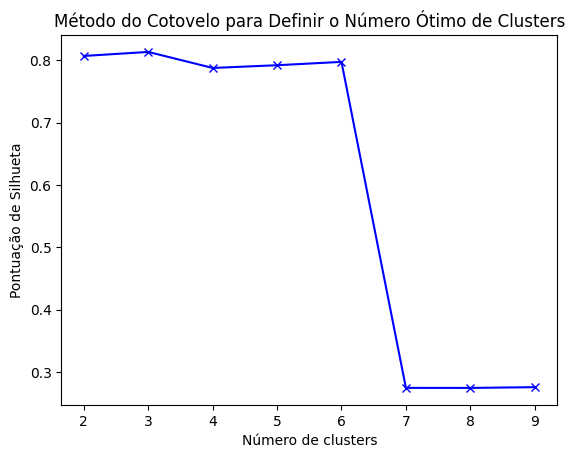

In [76]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Carregar os dados
# df = pd.read_csv('seu_arquivo.csv')

# Pré-processamento e PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_fundamentals_numeric_cols)
pca = PCA(n_components=5)
principal_components = pca.fit_transform(df_scaled)

# Determinar o número ótimo de clusters
range_n_clusters = list(range(2, 10))
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(principal_components)
    silhouette_avg.append(silhouette_score(principal_components, cluster_labels))

# Plotar o gráfico do método do cotovelo
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Pontuação de Silhueta')
plt.title('Método do Cotovelo para Definir o Número Ótimo de Clusters')
plt.show()

# Escolher o número de clusters com a maior pontuação de silhueta
optimal_num_clusters = range_n_clusters[silhouette_avg.index(max(silhouette_avg))]

# Clustering final com o número ótimo de clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=10)
clusters = kmeans.fit_predict(principal_components)

# Adicionar os labels do cluster ao DataFrame original para análise
df_fundamentals_numeric_cols['Cluster'] = clusters

# Aqui você poderia analisar as médias dos indicadores financeiros por cluster
# para determinar qual cluster pode ser o 'melhor' para investimento.


In [77]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Carregar os dados
# df = pd.read_csv('seu_arquivo.csv')

# Pré-processamento e PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_fundamentals_numeric_cols)
pca = PCA(n_components=5)
principal_components = pca.fit_transform(df_scaled)

# Clustering com K-means
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(principal_components)

# Adicionar os labels do cluster ao DataFrame original para análise
df_fundamentals_numeric_cols['Cluster'] = clusters

# Análise dos Clusters
# Você pode agora analisar as propriedades estatísticas dos clusters, como as médias ou medianas
# de variáveis financeiras importantes, para entender as características de cada cluster.
# Isso pode incluir a análise de métricas como retorno sobre o investimento, crescimento da receita,
# estabilidade financeira, etc.

# Por exemplo, para ver a média do EBITDA por cluster:
cluster_analysis = df_fundamentals_numeric_cols.groupby('Cluster')['ebitda'].mean()

print(cluster_analysis)


Cluster
0    2.087181e+09
1    0.000000e+00
2   -9.131000e+06
3    2.910870e+11
Name: ebitda, dtype: float64


In [78]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px

# Carregar os dados
# df = pd.read_csv('seu_arquivo.csv')

# Pré-processamento
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_fundamentals_numeric_cols)

# PCA
pca = PCA(n_components=5)
principal_components = pca.fit_transform(df_scaled)

# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(principal_components)

# Adicionar os labels do cluster de volta para os componentes principais
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
principal_df['Cluster'] = clusters

# Plotly 3D Scatter plot
fig = px.scatter_3d(principal_df, x='PC1', y='PC2', z='PC3', color='Cluster',
                    title="Visualização 3D dos Clusters",
                    labels={'PC1': 'Componente Principal 1', 'PC2': 'Componente Principal 2', 'PC3': 'Componente Principal 3'})

fig.show()


In [79]:
# Supondo que você já tenha o DataFrame original 'df' e os rótulos dos clusters 'clusters'
df_fundamentals_book['Cluster'] = clusters  # Adiciona a coluna de cluster ao DataFrame original

# Para listar as empresas por cluster, agrupe o DataFrame por 'Cluster' e então liste as empresas
# Supondo que você tenha uma coluna 'company_name' ou 'ticker' que identifica as empresas
clusters_and_companies = df_fundamentals_book.groupby('Cluster')['ticker'].apply(list).reset_index()

# Isso criará um novo DataFrame onde cada linha contém um número de cluster e a lista de empresas pertencentes a ele
print(clusters_and_companies)


   Cluster                                             ticker
0        0  [ABCB4.SA, AGRO3.SA, RAIL3.SA, ALPA3.SA, ALPA4...
1        1                                         [BRPR3.SA]
2        2  [BBAS3.SA, BBDC3.SA, BBDC4.SA, ITUB3.SA, ITUB4...
3        3                               [PETR3.SA, PETR4.SA]


In [80]:
principal_df

,PC1,PC2,PC3,PC4,PC5,Cluster
0,-0.345641,0.063876,0.469360,0.497924,0.241048,0
1,-0.541137,0.149542,-1.267230,-0.180357,-0.250607,0
2,0.156623,-0.331036,-1.131146,-0.665595,-1.010866,0
3,-0.887789,-0.269821,0.582653,-0.032574,-0.103663,0
4,-0.761371,-0.384762,0.259357,-0.577482,-0.401088,0
...,...,...,...,...,...,...
286,10.217673,-2.046993,4.006180,3.683645,-2.261282,2
287,-0.440523,-0.241852,-0.859217,0.136244,-0.061334,0
288,-0.698637,0.076356,-0.954229,-0.145556,-0.421186,0
289,-0.773207,-0.734756,-0.606143,-1.348658,-1.414746,0


In [81]:
# Agora vamos calcular a média de algumas métricas financeiras por cluster
cluster_metrics = df_fundamentals_numeric_cols.groupby('Cluster').agg({
    'total_revenue': 'mean',
    'profit_margins': 'mean',
    'ebitda': 'mean',
    # Adicione aqui outras métricas que deseja analisar
}).reset_index()

print(cluster_metrics)


   Cluster  total_revenue  profit_margins        ebitda
0        0   1.157086e+10        0.288359  2.087181e+09
1        1   7.592340e+10        0.263612  0.000000e+00
2        2   1.584440e+08       -0.126640 -9.131000e+06
3        3   5.815630e+11        0.268890  2.910870e+11
